# Unagged cross-section ratio of $d(e,e'\pi^+)/d(e,e'\pi^+)$ 


last edit June-10, 2023

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;

Welcome to JupyROOT 6.26/06
Loaded bin migration and acceptance weights from MC calculations.


In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

## (1) Load data

In [3]:
subdirname = "sidisdvcs_24Mar2023_commit_cfbc431" 
e_e_pi,_,_ = load_SIDIS_data( Nruns = -1,
                             rgb_runs_filenames = ["good_runs_10-2-final.txt",
                                                   "good_runs_10-4.txt",
                                                   "good_runs_10-6.txt"], 
                             subdirname = subdirname,
                             do_e_e_pi_n=False, do_e_e_pi_FreeP=False, 
                             fdebug=0 );

Done loading files.


## (2) Apply selection cuts not previously imposed

In [4]:
import time

In [5]:
print('number of pi+ events: %.1f'%(len(e_e_pi['piplus'])/1e6),'M')

number of pi+ events: 60.3 M


In [6]:
# AcceptanceMatchingType  ='p-theta-phi'
AcceptanceMatchingType  ='p-theta'
Nevents = -1
t0 = time.time()
e_e_pi_pass_cuts,_,_,_ = apply_further_selection_cuts_to_data(fdebug=0, 
                                                              NeventsMax=Nevents,
                                                              AcceptanceMatchingType = AcceptanceMatchingType);
t1 = time.time() 
print("Time elapsed: %.2f"%(t1 - t0), 'sec (%g us/event)'%((t0-t1)/Nevents*1.e6)) # CPU seconds elapsed (floating point)

Applying selection cuts not previously imposed
Apply a π+/π- acceptance matching cut on the in p-theta plane


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1748: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1748: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1748: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SI

Apply a cut on the missing mass of a (e,e'π) reaction: 1.7<Mx<5.0 GeV/c2
(e,e π+ )
60284747 events after original cut (100.0 %)
40927825 events after p-theta cut (67.9 %)
33371890 events after Mx cut (55.4 %)
33311918 events after Kinematical cut (55.3 %)
(e,e π- )
25164298 events after original cut (100.0 %)
24375936 events after p-theta cut (96.9 %)
20614743 events after Mx cut (81.9 %)
20576698 events after Kinematical cut (81.8 %)
 
Done applying event-selection cuts
Time elapsed: 307.87 sec (3.07872e+08 us/event)


In [7]:
Nevents = -1
t0= time.time()
e_e_pi_pass_cuts_3DAcceptanceMatch,_,_,_ = apply_further_selection_cuts_to_data(fdebug=0, 
                                                                                NeventsMax=Nevents,
                                                                                AcceptanceMatchingType  ='p-theta-phi');
t1 = time.time() 
print("Time elapsed: %.2f"%(t1 - t0), 'sec (%g us/event)'%((t0-t1)/Nevents*1.e6)) # CPU seconds elapsed (floating point)

Applying selection cuts not previously imposed


/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)


Apply a cut on the missing mass of a (e,e'π) reaction: 1.7<Mx<5.0 GeV/c2
(e,e π+ )
60284747 events after original cut (100.0 %)
31775458 events after p-theta cut (52.7 %)
25577705 events after Mx cut (42.4 %)
25532018 events after Kinematical cut (42.4 %)
(e,e π- )
25164298 events after original cut (100.0 %)
20499545 events after p-theta cut (81.5 %)
17216721 events after Mx cut (68.4 %)
17185457 events after Kinematical cut (68.3 %)
 
Done applying event-selection cuts
Time elapsed: 129.34 sec (1.29342e+08 us/event)


## (3) Define binning for cross-section ratio as a function of Bjorken $x$, and results path
For a standing proton use $x_B$, defined as
$ x_B = Q^2/2m_p\omega$

In [45]:
dQ2 = 1
Q2_min_arr = np.arange(2,8,dQ2)
Q2_max_arr = Q2_min_arr + dQ2

dxB = 0.1
xB_min_arr = np.arange(0.2,0.6,dxB)
xB_max_arr = xB_min_arr + dxB

dz = 0.1
z_min_arr = np.arange(0.3,0.8,dz)
z_max_arr = z_min_arr + dz

dpT = 0.3
pT_min_arr = np.arange(0.,1.2,dpT)
pT_max_arr = pT_min_arr + dpT

In [46]:
print('Q2', end=": " )
for Q2_min,Q2_max in zip(Q2_min_arr, Q2_max_arr): print('%.1f - %.1f, '%(Q2_min,Q2_max), end="" )
print()
print('xB', end=": " )
for xB_min,xB_max in zip(xB_min_arr, xB_max_arr): print('%.1f - %.1f, '%(xB_min,xB_max), end="" )
print()
print('z', end=": " )
for z_min,z_max in zip(z_min_arr, z_max_arr): print('%.1f - %.1f, '%(z_min,z_max), end="" )
print()
print('pT', end=": " )
for pT_min,pT_max in zip(pT_min_arr, pT_max_arr): print('%.1f - %.1f, '%(pT_min,pT_max), end="" )

Q2: 2.0 - 3.0, 3.0 - 4.0, 4.0 - 5.0, 5.0 - 6.0, 6.0 - 7.0, 7.0 - 8.0, 
xB: 0.2 - 0.3, 0.3 - 0.4, 0.4 - 0.5, 0.5 - 0.6, 
z: 0.3 - 0.4, 0.4 - 0.5, 0.5 - 0.6, 0.6 - 0.7, 0.7 - 0.8, 
pT: 0.0 - 0.3, 0.3 - 0.6, 0.6 - 0.9, 0.9 - 1.2, 

In [47]:
var_label = "standing proton x"
var    = 'xB'
xlabel = "Bjorken $x$"

In [48]:
results_path = '/Users/erezcohen/Desktop/data/BAND/Results/' + 'Results_10June2023/'

# (4) Extract cross-section ratio as a function of $x_B$ and save tabular data to results files

## (4.0) Integrated on kinematics

In [49]:
prefix = 'Untagged_SIDIS_ratio_'
suffix = ''

In [50]:
data_path = results_path + '4Dbins_Q2_xB_z_pT/'
if not os.path.exists(data_path): os.makedirs(data_path)

In [ ]:


# ----------------------- #
def compute_ratio_pips_to_pims(df_dict,
                               specific_run_number=None,
                               var='xB',
                               bins=np.linspace(0,1,10),
                               xB_min_arr=None, xB_max_arr=None,
                               zvar="Zpi",
                               z_min=0,    z_max=1,
                               M_x_min=0,  M_x_max=np.inf,
                               W_min=0,    W_max=np.inf,
                               Q2_min = 0, Q2_max= np.inf,
                               pT_min = 0, pT_max= np.inf,
                               phi_min = 0,phi_max= np.inf,                               
                               Mx_d_min=0, fdebug=0,
                               weight_option = 'bin migration + acceptance + meson subtraction',
                               cutoff = 1.e-8 ):#{
    '''
    last edit Aug-25, 2023
    
    [R_pips_to_pims, R_pips_to_pims_errup, R_pips_to_pims_errdw,
     N_pips, N_pims,
     Zavg_pips, Zavg_pims,
     N_pips_err, N_pims_err,
     N_pips_weighted,N_pips_weighted_err, 
     N_pims_weighted,N_pims_weighted_err,
     R_pips_to_pims_corrected, 
     R_pips_to_pims_corrected_errup, R_pips_to_pims_corrected_errdw] = compute_ratio_pips_to_pims(df_dict,
                               specific_run_number=None,
                               var='xB',
                               bins=np.linspace(0,1,10),
                               z_min=0,   z_max=1,
                               M_x_min=0, M_x_max=np.inf,
                               W_min=0,   W_max=np.inf,
                               Q2_min = 0, Q2_max= np.inf,
                               Mx_d_min=0, fdebug=0 )
    
    
    input:
    -------
    M_x_min               float         minimal M_x
    M_x_max               float         maximal M_x
    weight                str           MC corrections applied 
                                        '' / 'bin migration' / 'acceptance' / 'bin migration + acceptance' + / 'bin migration + acceptance + meson subtraction'
    
    return:
    -------
    R_pips_to_pims                np.array()   number of π+ events in each x-bin / number of π-
    R_pips_to_pims_errup          np.array()   err-up in number of π+ events in each x-bin / number of π-
    R_pips_to_pims_errdw          np.array()   err-dw in number of π+ events in each x-bin / number of π-

    R_normed_pips_to_pims         np.array()   R_pips_to_pims normalized by beam-charge
    R_normed_pips_to_pims_errup   np.array()   R_pips_to_pims_errup normalized by beam-charge
    R_normed_pips_to_pims_errdw   np.array()   R_pips_to_pims_errdw normalized by beam-charge

    N_pips                        np.array()   number of π+ events in each x-bin
    N_pims                        np.array()   number of π- events in each x-bin
    Zavg_pips                     float        mean z-value in the range z_min < z < z_max for π+
    Zavg_pims                     float        mean z-value in the range z_min < z < z_max for π-
    N_pips_err                    np.array()   uncertainty number of π+ events in each x-bin
    N_pims_err                    np.array()   uncertainty in the number of π- events in each x-bin

        
    comments:
    -------
    MC corrections applied                          Apr-28, 2023: bin-migration and acceptance corrections
                                                    calculated by Jason M. P., using SIDIS MC + GEMC

    '''
    # z_min,z_max are z limits on the pion outgoing momentum
    df_pips = df_dict['piplus']
    df_pims = df_dict['piminus']
    if fdebug>2: print('Before cuts: ', len(df_pips),'π+ and',len(df_pims),'π-')        

    
    # bin in z or other kinematical variables
    df_pips = df_pips[  (z_min   < df_pips[zvar]) & (df_pips[zvar] < z_max  )
                      & (W_min   < df_pips.W  )   & (df_pips.W   < W_max  )   ]
    df_pims = df_pims[  (z_min   < df_pims[zvar]) & (df_pims[zvar] < z_max  )
                      & (W_min   < df_pims.W  )   & (df_pims.W   < W_max  )   ]
    if fdebug>2: print('after %.2f<%s<%.2f and W cuts: '%(z_min,zvar,z_max), len(df_pips),'π+ and',len(df_pims),'π-')        

    
    if 0 < M_x_min or M_x_max < np.inf:
        df_pips = df_pips[ (M_x_min < df_pips.M_x) & (df_pips.M_x < M_x_max) ]
        df_pims = df_pims[ (M_x_min < df_pims.M_x) & (df_pims.M_x < M_x_max) ]
        if fdebug>2: print('after Mx cut: ', len(df_pips),'π+ and',len(df_pims),'π-')        

        
    if 0 < Mx_d_min:
        df_pips = df_pips[ Mx_d_min < df_pips.M_x_d ]
        df_pims = df_pims[Mx_d_min < df_pims.M_x_d]
        if fdebug>2: print('after Mx(d) cut: ', len(df_pips),'π+ and',len(df_pims),'π-')        

       
    if 0 < Q2_min or Q2_max < np.inf:
        df_pips = df_pips[ (Q2_min < df_pips.Q2) & (df_pips.Q2 < Q2_max) ]
        df_pims = df_pims[ (Q2_min < df_pims.Q2) & (df_pims.Q2 < Q2_max) ]
        if fdebug>2: print('after %.1f<Q2<%.1f cut: '%(Q2_min,Q2_max), len(df_pips),'π+ and',len(df_pims),'π-')        


    if 0 < pT_min or pT_max < np.inf:
        df_pips = df_pips[ (pT_min < df_pips.pi_qFrame_pT) & (df_pips.pi_qFrame_pT < pT_max) ]
        df_pims = df_pims[ (pT_min < df_pims.pi_qFrame_pT) & (df_pims.pi_qFrame_pT < pT_max) ]
        if fdebug>2: print('after pT cut: ', len(df_pips),'π+ and',len(df_pims),'π-')        


    if 0 < phi_min or phi_max < np.inf:
        df_pips = df_pips[ (phi_min < df_pips.pi_qFrame_Phi) & (df_pips.pi_qFrame_Phi < phi_max) ]
        df_pims = df_pims[ (phi_min < df_pims.pi_qFrame_Phi) & (df_pims.pi_qFrame_Phi < phi_max) ]
        if fdebug>2: print('after phi cut: ', len(df_pips),'π+ and',len(df_pims),'π-')        


        
    if specific_run_number is not None:
        # if fdebug>1:  print('df_pips: before run %d filter: %d events'%(specific_run_number,len(df_pips)))
        df_pips = df_pips[df_pips.runnum == specific_run_number]
        df_pims = df_pims[df_pims.runnum == specific_run_number]
        if fdebug>2: print('after specific run filter: ', len(df_pips),'π+ and',len(df_pims),'π-')        

  

    if fdebug>1: print('compute R(pips/pims) weight option:',weight_option)
    if  ((weight_option == '') | (weight_option == None)): #{
        w_pips = np.ones( len(df_pips) )
        w_pims = np.ones( len(df_pims) )        
    #}        
    elif   weight_option == 'bin migration': #{
        w_pips = np.array( df_pips.binMigration_weight )
        w_pims = np.array( df_pims.binMigration_weight )        
    #}        
    elif   weight_option == 'acceptance': #{
        w_pips = np.array( df_pips.acceptance_weight )
        w_pims = np.array( df_pims.acceptance_weight )        
    #}     
    elif   weight_option == 'meson subtraction': #{
        w_pips = np.array( df_pips.mesonsubtraction_weight )
        w_pims = np.array( df_pims.mesonsubtraction_weight )        
    #}         
    elif weight_option == 'bin migration + acceptance':#{
        w_pips = np.array( df_pips.binMigration_weight * df_pips.acceptance_weight )
        w_pims = np.array( df_pims.binMigration_weight * df_pims.acceptance_weight )        
    #}

    elif weight_option == 'bin migration + acceptance + meson subtraction':#{
        w_pips = np.array( df_pips.binMigration_weight * df_pips.acceptance_weight * df_pips.mesonsubtraction_weight )
        w_pims = np.array( df_pims.binMigration_weight * df_pims.acceptance_weight * df_pims.mesonsubtraction_weight  )        
    #}



    Zavg_pips = np.mean( np.array(df_pips[zvar])  )
    Zavg_pims = np.mean( np.array(df_pims[zvar])  )


    pips = df_pips[var]
    pims = df_pims[var]
    R_pips_to_pims, R_pips_to_pims_err = [],[]
    N_pips, N_pims                     = [],[]
    N_pips_err, N_pims_err             = [],[]

    R_pips_to_pims_corrected, R_pips_to_pims_corrected_err = [],[]
    N_pips_weighted, N_pims_weighted                     = [],[]
    N_pips_weighted_err, N_pims_weighted_err             = [],[]

    if fdebug>1: print('%.2f<%s<%.2f: '%(z_min,zvar,z_max), len(pips),'π+ and',len(pims),'π-')        


    if xB_min_arr is bins[:-1]
    for x_min,x_max in zip(bins[:-1],bins[1:]):#{
        
        if fdebug>1: print('\t%.2f<%s<%.2f:'%(x_min,var,x_max),
                           len(pips[ (x_min < pips) & (pips < x_max) ]),'π+ and',
                           len(pims[ (x_min < pims) & (pims < x_max) ]),'π-')
        
        pips_in_bin      = pips[ (x_min < pips) & (pips < x_max) ]
        Npips_in_bin     = float(len(pips_in_bin))
        Npips_in_bin_err = sqrt(Npips_in_bin)

        pims_in_bin      = pims[ (x_min < pims) & (pims < x_max) ]
        Npims_in_bin     = float(len(pims_in_bin))
        Npims_in_bin_err = sqrt(Npims_in_bin)


        R     = Npips_in_bin / np.max([Npims_in_bin,1])
        R_err = R * np.sqrt( 1./np.max([1,Npips_in_bin]) + 1./np.max([1,Npims_in_bin]) )

        Npips_weighted_in_bin = Npips_in_bin;
        Npims_weighted_in_bin = Npims_in_bin;
        R_corrected           = R
        R_corrected_err       = R_err
        
        if weight_option is not None:#
            W_pips_in_bin   = w_pips[ (x_min < pips) & (pips < x_max) ]
            Npips_weighted_in_bin    = np.sum( W_pips_in_bin )
            Npips_weighted_in_bin_err= np.sqrt(np.sum( np.square(W_pips_in_bin )))
            
            W_pims_in_bin   = w_pims[ (x_min < pims) & (pims < x_max) ]
            Npims_weighted_in_bin    = np.sum( W_pims_in_bin )
            Npims_weighted_in_bin_err= np.sqrt(np.sum( np.square(W_pims_in_bin )))
            
            if Npims_weighted_in_bin < cutoff: R_corrected = 0
            else:                              R_corrected = Npips_weighted_in_bin / np.max([Npims_weighted_in_bin,cutoff])
            R_corrected_err = R_corrected * np.sqrt( np.square(Npips_weighted_in_bin_err/np.max([Npips_weighted_in_bin,cutoff]))                               
                                                    + np.square(Npims_weighted_in_bin_err/np.max([Npims_weighted_in_bin,cutoff]) ) )
        #}

        
        
        N_pips            .append(Npips_in_bin)
        N_pips_err        .append(Npips_in_bin_err)

        N_pims            .append(Npims_in_bin)
        N_pims_err        .append(Npims_in_bin_err)

        R_pips_to_pims    .append(R)
        R_pips_to_pims_err.append(R_err)

        N_pips_weighted            .append(Npips_weighted_in_bin)
        N_pips_weighted_err        .append(Npips_weighted_in_bin_err)

        N_pims_weighted            .append(Npims_weighted_in_bin)
        N_pims_weighted_err        .append(Npims_weighted_in_bin_err)

        R_pips_to_pims_corrected    .append(R_corrected)
        R_pips_to_pims_corrected_err.append(R_corrected_err)

    #}
    R_pips_to_pims_errup, R_pips_to_pims_errdw = get_err_up_dw( R_pips_to_pims, R_pips_to_pims_err )
    R_pips_to_pims_corrected_errup, R_pips_to_pims_corrected_errdw = get_err_up_dw( R_pips_to_pims_corrected, R_pips_to_pims_corrected_err )
    
    return [np.array(R_pips_to_pims),
            np.array(R_pips_to_pims_errup),
            np.array(R_pips_to_pims_errdw),
            np.array(N_pips),
            np.array(N_pims),
            Zavg_pips,
            Zavg_pims,
            np.array(N_pips_err),
            np.array(N_pims_err),
            np.array(N_pips_weighted),
            np.array(N_pips_weighted_err),           
            np.array(N_pims_weighted),
            np.array(N_pims_weighted_err),
            np.array(R_pips_to_pims_corrected),
            np.array(R_pips_to_pims_corrected_errup),          
            np.array(R_pips_to_pims_corrected_errdw)]
#}
# ----------------------- #








In [ ]:
df_results_4D = dict()

for pi_ch,pi_idx in zip(pi_charge_names,[1,2]):
    df_results_4D[pi_ch] = pd.DataFrame()

    for Q2_min,Q2_max in zip(Q2_min_arr, Q2_max_arr): # zip([Q2_min_arr[0]], [Q2_max_arr[0]]): #
        
        df_all_in_Q2_bin = df_all[ (Q2_min < df_all.Q2) & (df_all.Q2 < Q2_max)]                    
        df_direct_in_Q2_bin = df_direct[ (Q2_min < df_direct.Q2) & (df_direct.Q2 < Q2_max)]                
        
        for xB_min,xB_max in zip(xB_min_arr, xB_max_arr): # zip([xB_min_arr[0]], [xB_max_arr[0]]): # 
            
            df_all_in_xB_bin = df_all_in_Q2_bin[ (xB_min < df_all_in_Q2_bin.xB) & (df_all_in_Q2_bin.xB < xB_max)]
            df_direct_in_xB_bin = df_direct_in_Q2_bin[ (xB_min < df_direct_in_Q2_bin.xB) & (df_direct_in_Q2_bin.xB < xB_max)]
            
            for z_min,z_max in zip(z_min_arr, z_max_arr): # zip([z_min_arr[0]], [z_max_arr[0]]):  # 
                
                df_all_in_z_bin = df_all_in_xB_bin[ (z_min < df_all_in_xB_bin.Zpi) & (df_all_in_xB_bin.Zpi < z_max)]
                df_direct_in_z_bin = df_direct_in_xB_bin[ (z_min < df_direct_in_xB_bin.Zpi) & (df_direct_in_xB_bin.Zpi < z_max) ]
                    
                
                for pT_min,pT_max in zip(pT_min_arr, pT_max_arr): 



                    
                        R_Xsec = compute_ratio_pips_to_pims(df_dict = df_dict ,
                                                  var     = x_var,                                                
                                                  bins    = x_bins,
                                                  zvar    = zvar,
                                                  z_min   = z_min,   z_max   = z_max,
                                                  Q2_min  = Q2_min,  Q2_max  = Q2_max,
                                                  pT_min  = pT_min,  pT_max  = pT_max,
                                                  fdebug  = fdebug,
                                                  weight_option = 'bin migration + acceptance + meson subtraction')
                        
                        (R, R_err_up, R_err_dw,
                         N_pips,N_pims, Zavg_pips, Zavg_pims,
                         N_pips_err, N_pims_err,
                         N_pips_weighted,N_pips_weighted_err, 
                         N_pims_weighted,N_pims_weighted_err,
                         R_corrected,R_corrected_errup, R_corrected_errdw) = R_Xsec


                    x_bins = bins = np.linspace(0,1,10)
                    extract_SIDIS_Xsec_ratio(df_dict  = e_e_pi_pass_cuts, 
                                                x_var    = var ,
                                                x_bins   = x_bins,
                                                z_bins   = z_bins,
                                                z_widths = z_widths,          
                                                fdebug   = 0,
                                                data_path= data_path,
                                                prefix   = 'Untagged_SIDIS_ratio_',                    
                                                suffix   = suffix,
                                                Q2_min   = Q2min,
                                                    Q2_max   = Q2max,
                                                    pT_min   = pT_min,
                                                    pT_max   = pT_max,
                                                     weight_option='bin migration + acceptance + meson subtraction'
                                               )



Reading files from /Users/erezcohen/Desktop/data/BAND/Results/Results_10June2023/IntegratedOnKinematics//
Untagged_SIDIS_ratio_Zpi_min0.290_Zpi_mean_pips0.305_pims0.305_Zpi_max0.310.csv
Untagged_SIDIS_ratio_Zpi_min0.590_Zpi_mean_pips0.600_pims0.600_Zpi_max0.610.csv
Untagged_SIDIS_ratio_Zpi_min0.640_Zpi_mean_pips0.650_pims0.650_Zpi_max0.660.csv
Untagged_SIDIS_ratio_Zpi_min0.540_Zpi_mean_pips0.550_pims0.550_Zpi_max0.560.csv
Untagged_SIDIS_ratio_Zpi_min0.340_Zpi_mean_pips0.350_pims0.350_Zpi_max0.360.csv
Untagged_SIDIS_ratio_Zpi_min0.740_Zpi_mean_pips0.748_pims0.748_Zpi_max0.760.csv
Untagged_SIDIS_ratio_Zpi_min0.390_Zpi_mean_pips0.400_pims0.400_Zpi_max0.410.csv
Untagged_SIDIS_ratio_Zpi_min0.440_Zpi_mean_pips0.450_pims0.450_Zpi_max0.460.csv
Untagged_SIDIS_ratio_Zpi_min0.490_Zpi_mean_pips0.500_pims0.500_Zpi_max0.510.csv
Untagged_SIDIS_ratio_Zpi_min0.690_Zpi_mean_pips0.699_pims0.699_Zpi_max0.710.csv
Done.


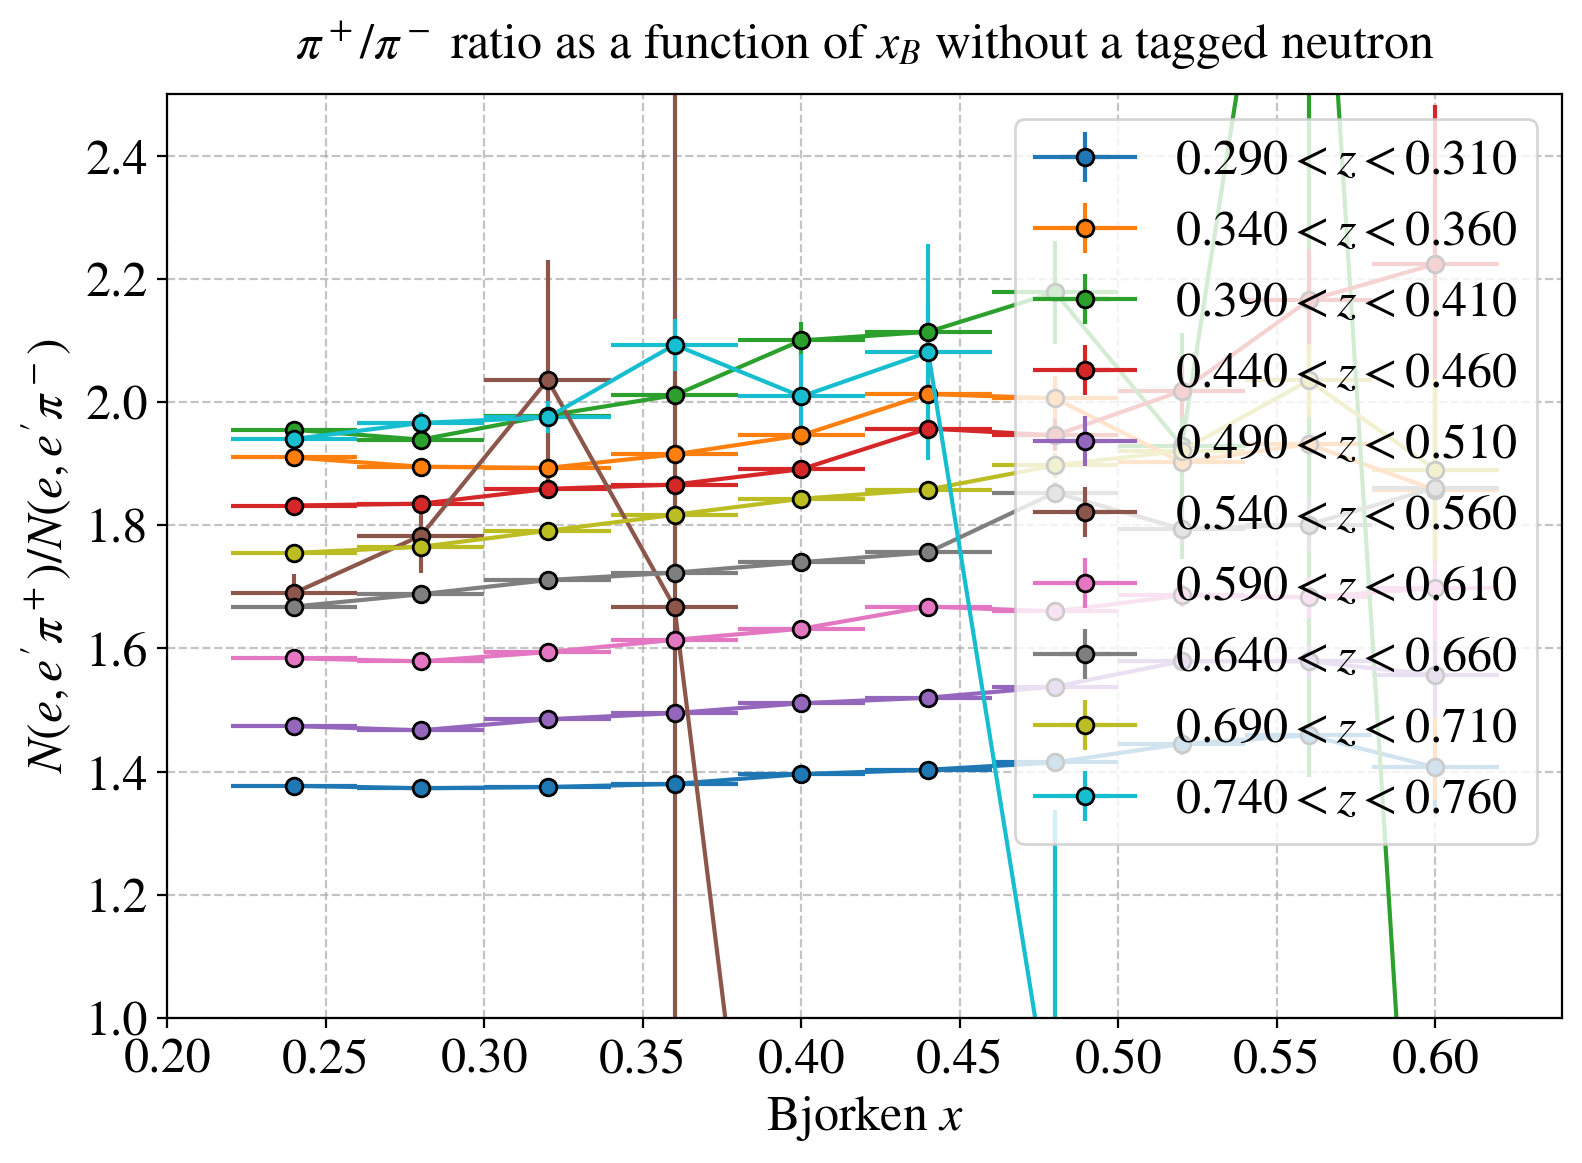

In [13]:
SIDIS_results = load_SIDIS_ratio(prefix = prefix, 
                                 suffix = suffix, 
                                 doPlotResults=True, 
                                 data_path=data_path,fdebug=3)
ax = plt.gca()
ax.set_ylim(1,2.5);

## (4.1) Results in different bins of $Q^2$ integrated over $W$

In [14]:
data_path= results_path + 'Q2_bins/'
if not os.path.exists(data_path): os.makedirs(data_path)
Q2_min_arr = np.arange(2,8,0.5)
Q2_max_arr = Q2_min_arr + 0.5

In [15]:
for Q2_min,Q2_max,indcs in zip(Q2_min_arr,Q2_max_arr,range(10)):
    suffix   = '_%.1f_Q2_%.1f'%(Q2_min,Q2_max)
    print(suffix)
    extract_SIDIS_Xsec_ratio(df_dict  = e_e_pi_pass_cuts, 
                        x_var    = var ,
                        x_bins   = x_bins,
                        z_bins   = z_bins,
                        z_widths = z_widths,          
                        fdebug   = 0,
                        data_path= data_path,
                        prefix   = 'Untagged_SIDIS_ratio_',                    
                        suffix   = suffix,
                        Q2_min   = Q2_min,
                        Q2_max   = Q2_max, 
                             weight_option='bin migration + acceptance + meson subtraction'
                       )
print('done.')

_2.0_Q2_2.5
_2.5_Q2_3.0
_3.0_Q2_3.5
_3.5_Q2_4.0
_4.0_Q2_4.5
_4.5_Q2_5.0


/opt/homebrew/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = arr.dtype.type(ret / rcount)


_5.0_Q2_5.5
_5.5_Q2_6.0
_6.0_Q2_6.5
_6.5_Q2_7.0
done.


In [16]:
data_path= results_path + 'Q2_bins_with_partial_corrections/'
if not os.path.exists(data_path): os.makedirs(data_path)

for Q2_min,Q2_max in zip([2,3,4],[2.5,3.5,4]):
    for suffix_str,weight_option in zip(['meson_subtraction','bin_migration','acceptance','bin_migration_acceptance','bin_migration_acceptance_meson_subtraction'],                                   
                                        ['meson subtraction','bin migration','acceptance','bin migration + acceptance','bin migration + acceptance + meson subtraction']):
        suffix   = suffix_str +'_%.1f_Q2_%.1f'%(Q2_min,Q2_max)
        print(suffix)
        extract_SIDIS_Xsec_ratio(df_dict  = e_e_pi_pass_cuts, 
                            x_var    = var ,
                            x_bins   = x_bins,
                            z_bins   = z_bins,
                            z_widths = z_widths,          
                            fdebug   = 0,
                            data_path= data_path,
                            prefix   = 'Untagged_SIDIS_ratio_',                    
                            suffix   = suffix,
                            Q2_min   = Q2_min,
                            Q2_max   = Q2_max, 
                                 weight_option=weight_option
                           )
print('done.')

meson_subtraction_2.0_Q2_2.5
bin_migration_2.0_Q2_2.5
acceptance_2.0_Q2_2.5
bin_migration_acceptance_2.0_Q2_2.5
bin_migration_acceptance_meson_subtraction_2.0_Q2_2.5
meson_subtraction_3.0_Q2_3.5
bin_migration_3.0_Q2_3.5
acceptance_3.0_Q2_3.5
bin_migration_acceptance_3.0_Q2_3.5
bin_migration_acceptance_meson_subtraction_3.0_Q2_3.5
meson_subtraction_4.0_Q2_4.0
bin_migration_4.0_Q2_4.0
acceptance_4.0_Q2_4.0
bin_migration_acceptance_4.0_Q2_4.0
bin_migration_acceptance_meson_subtraction_4.0_Q2_4.0
done.


## (4.2) $Q^2$ bins integrated over $W$, compare accetpance matching in $p-\theta$ vs. $p-\theta-\phi$

In [17]:
data_path = results_path + 'Q2_bins_AcceptanceMatch3D/'
if not os.path.exists(data_path): os.makedirs(data_path)

In [18]:
for Q2_min,Q2_max in zip(Q2_min_arr,Q2_max_arr):
    suffix   = '_%.1f_Q2_%.1f'%(Q2_min,Q2_max)
    print(suffix)
    extract_SIDIS_Xsec_ratio(df_dict  = e_e_pi_pass_cuts_3DAcceptanceMatch, 
                        x_var    = var ,
                        x_bins   = x_bins,
                        z_bins   = z_bins,
                        z_widths = z_widths,          
                        fdebug   = 0,
                        data_path= data_path,
                        prefix   = 'Untagged_SIDIS_ratio_',                    
                        suffix   = suffix,
                        Q2_min   = Q2_min,
                        Q2_max   = Q2_max,
                        weight_option='bin migration + acceptance'
                       )
print('done.')

_2.0_Q2_2.5
_2.5_Q2_3.0
_3.0_Q2_3.5
_3.5_Q2_4.0
_4.0_Q2_4.5
_4.5_Q2_5.0
_5.0_Q2_5.5
_5.5_Q2_6.0
_6.0_Q2_6.5
_6.5_Q2_7.0
_7.0_Q2_7.5
_7.5_Q2_8.0
done.


# (5) Extract modified results
E.g. in different kinematical bins 

## (5.1) Difference between different beam eneries

Since there are slightly different kinematics - due to the different beam enegries,
we match the $Q^2$ range for all energies to $3 < Q^2 < 4$ (GeV/c)$^2$

In [19]:
data_path = results_path + 'DifferentBeamEnergies/'
if not os.path.exists(data_path): os.makedirs(data_path)
Q2_min = 4.0
Q2_max = 4.5

In [20]:
indcs = dict()
e_e_pi_pass_cuts_DifferentEbeam = dict()
for E, rum_min, run_max in zip([10.2,10.4 ,10.6],
                               [6400,11360,6160],
                               [6600,11570,6400]):
    e_e_pi_pass_cuts_DifferentEbeam[E] = dict()
    for pi_ch in pi_charge_names:
        indcs[pi_ch + '%.1f'%E] = np.where( (rum_min < e_e_pi_pass_cuts[pi_ch].runnum)                               
                                           & 
                                           (e_e_pi_pass_cuts[pi_ch].runnum < run_max)) 
        e_e_pi_pass_cuts_DifferentEbeam[E][pi_ch] = e_e_pi_pass_cuts[pi_ch].iloc[indcs[pi_ch + '%.1f'%E]]
        
print('Done')        

Done


In [21]:
for E, rum_min, run_max in zip([10.2,10.4 ,10.6],
                               [6400,11360,6160],
                               [6600,11570,6400]):

    extract_SIDIS_Xsec_ratio(df_dict  = e_e_pi_pass_cuts_DifferentEbeam[E],
                        x_var    = var ,
                        x_bins   = x_bins,
                        z_bins   = z_bins,
                        z_widths = z_widths,          
                        fdebug   = 0,
                        data_path= data_path,
                        prefix   = 'Untagged_SIDIS_ratio_',                    
                        suffix   = '_E_%.1fGeV_%.1f_Q2_%.1f_GeV'%(E,Q2_min,Q2_max),
                        Q2_min   = Q2_min,
                        Q2_max   = Q2_max)
print('Done extracting cross-sections for different E(beam)')

Done extracting cross-sections for different E(beam)


## (5.2) Different electron sector

In [22]:
data_path = results_path + 'DifferentElectronSector/'
if not os.path.exists(data_path): os.makedirs(data_path)
Q2_min,Q2_max = 4.0, 4.5

In [23]:
indcs = dict()
e_e_pi_pass_cuts_Different_eSector = dict()
for eSector in np.arange(1,7,1):
    e_e_pi_pass_cuts_Different_eSector[eSector] = dict()
    for pi_ch in pi_charge_names:
        indcs[pi_ch + '%d'%eSector] = np.where( e_e_pi_pass_cuts[pi_ch].e_DC_sector==eSector ) 
        e_e_pi_pass_cuts_Different_eSector[eSector][pi_ch] = e_e_pi_pass_cuts[pi_ch].iloc[indcs[pi_ch + '%d'%eSector]]
        
print('Done')        

Done


In [24]:
for eSector in np.arange(1,7,1):

    extract_SIDIS_Xsec_ratio(df_dict  = e_e_pi_pass_cuts_Different_eSector[eSector],
                        x_var    = var ,
                        x_bins   = x_bins,
                        z_bins   = z_bins,
                        z_widths = z_widths,          
                        fdebug   = 0,
                        data_path= data_path,
                        prefix   = 'Untagged_SIDIS_ratio_',                    
                        suffix   = '_e_Sector_%d_%.1f_Q2_%.1f_GeV'%(eSector,Q2_min,Q2_max),
                        Q2_min   = Q2_min,
                        Q2_max   = Q2_max)
print('Done extracting cross-sections for different e-Sector')

Done extracting cross-sections for different e-Sector


## (5.3) Different pion sector

In [25]:
data_path = results_path + 'DifferentPiSector/'
if not os.path.exists(data_path): os.makedirs(data_path)
Q2_min,Q2_max = 4.0, 4.5

In [26]:
indcs = dict()
e_e_pi_pass_cuts_Different_PiSector = dict()
for PiSector in np.arange(1,7,1):
    e_e_pi_pass_cuts_Different_PiSector[PiSector] = dict()
    for pi_ch in pi_charge_names:
        indcs[pi_ch + '%d'%PiSector] = np.where( e_e_pi_pass_cuts[pi_ch].pi_DC_sector==PiSector ) 
        e_e_pi_pass_cuts_Different_PiSector[PiSector][pi_ch] = e_e_pi_pass_cuts[pi_ch].iloc[indcs[pi_ch + '%d'%PiSector]]
        
print('Done')        

Done


In [27]:
for PiSector in np.arange(1,7,1):
    extract_SIDIS_Xsec_ratio(df_dict  = e_e_pi_pass_cuts_Different_PiSector[PiSector],
                        x_var    = var ,
                        x_bins   = x_bins,
                        z_bins   = z_bins,
                        z_widths = z_widths,          
                        fdebug   = 0,
                        data_path= data_path,
                        prefix   = 'Untagged_SIDIS_ratio_',                    
                        suffix   = '_Pi_Sector_%d_%.1f_Q2_%.1f_GeV'%(PiSector,Q2_min,Q2_max),
                        Q2_min   = Q2_min,
                        Q2_max   = Q2_max)
print('Done extracting cross-sections for different π-Sector')

Done extracting cross-sections for different π-Sector


## (5.4) Different bins of $M_x$

In [28]:
data_path= results_path + 'Mx_bins/'
if not os.path.exists(data_path): os.makedirs(data_path)
M_x_min_arr = [1.7,2.0,2.5]
M_x_max_arr = [2.5,3.0,3.5]

In [29]:
for M_x_min,M_x_max in zip(M_x_min_arr,M_x_max_arr):
    print(M_x_min,'<M_x<',M_x_max)
    extract_SIDIS_Xsec_ratio(df_dict  = e_e_pi_pass_cuts,
                        x_var    = var ,
                        x_bins   = x_bins,
                        z_bins   = z_bins,
                        z_widths = z_widths,          
                        fdebug   = 0,
                        data_path= data_path,
                        prefix   = 'Untagged_SIDIS_ratio_',                    
                        suffix   = '_Mx_%.2f-%.2f_GeV'%(M_x_min,M_x_max),
                        M_x_min  = M_x_min,
                        M_x_max  = M_x_max)
    
print('done.')

1.7 <M_x< 2.5
2.0 <M_x< 3.0
2.5 <M_x< 3.5
done.


### (5.4.1) bins of $M_x$ and $Q^2$

In [30]:
data_path= results_path + 'Mx_and_Q2_bins/'
if not os.path.exists(data_path): os.makedirs(data_path)
M_x_min_arr = [0.0,2.0]
M_x_max_arr = [2.0,4.0]
Q2_min_arr  = [2.0,4.0]
Q2_max_arr  = [4.0,9.0]


for Q2_min,Q2_max in zip(Q2_min_arr,Q2_max_arr):
    print(Q2_min,'<Q2<',Q2_max)

    for M_x_min,M_x_max in zip(M_x_min_arr,M_x_max_arr):
        print('\t',M_x_min,'<M_x<',M_x_max)

        extract_SIDIS_Xsec_ratio(df_dict  = e_e_pi_pass_cuts,
                            x_var    = var ,
                            x_bins   = x_bins,
                            z_bins   = z_bins,
                            z_widths = z_widths,          
                            fdebug   = 0,
                            data_path= data_path,
                            prefix   = 'Untagged_SIDIS_ratio_',                    
                            suffix   = '_Mx_%.2f-%.2f_GeV_Q2_%.2f-%.2f_GeV'%(M_x_min,M_x_max,Q2_min,Q2_max),
                            Q2_min   = Q2_min,
                            Q2_max   = Q2_max,
                            M_x_min  = M_x_min,
                            M_x_max  = M_x_max)
    
print('done.')

2.0 <Q2< 4.0
	 0.0 <M_x< 2.0
	 2.0 <M_x< 4.0
4.0 <Q2< 9.0
	 0.0 <M_x< 2.0
	 2.0 <M_x< 4.0
done.


## (5.5) Results at high-$Q^2$ in different bins of $p_T$ or $\phi_\pi$

In [31]:
# Q2_min,Q2_max = 4.0,4.5
# Q2_min,Q2_max = 3.0,3.5
# Q2_min,Q2_max = 2.0,2.5

In [32]:
dpT = 0.25
pT_min_arr = np.arange(0,1,dpT)
pT_max_arr = pT_min_arr + dpT
pT_min_arr, pT_max_arr

(array([0.  , 0.25, 0.5 , 0.75]), array([0.25, 0.5 , 0.75, 1.  ]))

In [33]:
for Q2min,Q2max in zip([2.,3.,4.],[2.5,3.5,4.5]):
    data_path= results_path + 'pT_bins_%.1f_Q2_%.1f/'%(Q2min,Q2max)
    if not os.path.exists(data_path): os.makedirs(data_path)

    for pT_min,pT_max in zip(pT_min_arr,pT_max_arr):
        suffix   = '_%.2f_pT_%.2f'%(pT_min,pT_max)
        print(suffix)
        extract_SIDIS_Xsec_ratio(df_dict  = e_e_pi_pass_cuts, 
                            x_var    = var ,
                            x_bins   = x_bins,
                            z_bins   = z_bins,
                            z_widths = z_widths,          
                            fdebug   = 0,
                            data_path= data_path,
                            prefix   = 'Untagged_SIDIS_ratio_',                    
                            suffix   = suffix,
                            Q2_min   = Q2min,
                            Q2_max   = Q2max,
                            pT_min   = pT_min,
                            pT_max   = pT_max,
                           )
    print('Done %.1f<Q2<%.1f'%(Q2min,Q2max))
print('done.')

_0.00_pT_0.25
_0.25_pT_0.50
_0.50_pT_0.75
_0.75_pT_1.00
Done 2.0<Q2<2.5
_0.00_pT_0.25
_0.25_pT_0.50
_0.50_pT_0.75
_0.75_pT_1.00
Done 3.0<Q2<3.5
_0.00_pT_0.25
_0.25_pT_0.50
_0.50_pT_0.75
_0.75_pT_1.00
Done 4.0<Q2<4.5
done.


In [34]:
phi_min_arr = np.arange(-np.pi,np.pi-np.pi/3,np.pi/3)
phi_max_arr = phi_min_arr + np.pi/3
phi_min_arr, phi_max_arr

(array([-3.14159265e+00, -2.09439510e+00, -1.04719755e+00, -8.88178420e-16,
         1.04719755e+00,  2.09439510e+00]),
 array([-2.09439510e+00, -1.04719755e+00, -6.66133815e-16,  1.04719755e+00,
         2.09439510e+00,  3.14159265e+00]))

In [35]:
for Q2min,Q2max in zip([2.,3.,4.],[2.5,3.5,4.5]):
    data_path= results_path + 'phi_bins_%.1f_Q2_%.1f/'%(Q2min,Q2max)
    if not os.path.exists(data_path): os.makedirs(data_path)

    for phi_min,phi_max in zip(phi_min_arr, phi_max_arr):
        suffix   = '_%.2f_phi_%.2f'%(phi_min,phi_max)
        print(suffix)
        extract_SIDIS_Xsec_ratio(df_dict  = e_e_pi_pass_cuts, 
                            x_var    = var ,
                            x_bins   = x_bins,
                            z_bins   = z_bins,
                            z_widths = z_widths,          
                            fdebug   = 0,
                            data_path= data_path,
                            prefix   = 'Untagged_SIDIS_ratio_',                    
                            suffix   = suffix,
                            Q2_min   = Q2min,
                            Q2_max   = Q2max,
                            phi_min   = phi_min,
                            phi_max   = phi_max,
                           )
    print('Done %.1f<Q2<%.1f'%(Q2min,Q2max))        
print('done.')

_-3.14_phi_-2.09
_-2.09_phi_-1.05
_-1.05_phi_-0.00
_-0.00_phi_1.05
_1.05_phi_2.09
_2.09_phi_3.14
Done 2.0<Q2<2.5
_-3.14_phi_-2.09
_-2.09_phi_-1.05
_-1.05_phi_-0.00
_-0.00_phi_1.05
_1.05_phi_2.09
_2.09_phi_3.14
Done 3.0<Q2<3.5
_-3.14_phi_-2.09
_-2.09_phi_-1.05
_-1.05_phi_-0.00
_-0.00_phi_1.05
_1.05_phi_2.09
_2.09_phi_3.14
Done 4.0<Q2<4.5
done.


## (5.6) Different bins of $Q^2$ and $W$

In [36]:
# from IPython.display import IFrame
# IFrame('Q2.png', width=600, height=300)

In [37]:
# IFrame('W.png', width=600, height=300)

In [38]:
Q2_min_arr = [2.0, 2.8, 3.6]
Q2_max_arr = [2.8, 3.6, 8.0]

W_min_arr = np.linspace(2.5,3.1,3)
W_max_arr = np.linspace(2.8,3.4,3)
# print(W_min_arr)  # print(W_max_arr)

z_bins   = np.arange(0.3,0.8,0.05)
z_widths = 0.01*np.ones(len(z_bins))

In [39]:
data_path= '/Users/erezcohen/Desktop/data/BAND/Results/Q2_and_W_bins/'
if not os.path.exists(data_path): os.makedirs(data_path)


for Q2_min,Q2_max in zip(Q2_min_arr,Q2_max_arr):
    for W_min,W_max in zip(W_min_arr,W_max_arr):
        suffix   = '_%.1f_Q2_%.1f____%.1f_W_%.1f'%(Q2_min,Q2_max,W_min,W_max)
        print(suffix)
        extract_SIDIS_Xsec_ratio(df_dict  = e_e_pi_pass_cuts, 
                            x_var    = var ,
                            x_bins   = x_bins,
                            z_bins   = z_bins,
                            z_widths = z_widths,          
                            fdebug   = 0,
                            data_path= data_path,
                            prefix   = 'Untagged_SIDIS_ratio_',                    
                            suffix   = suffix,
                            W_min    = W_min,
                            W_max    = W_max,
                            Q2_min   = Q2_min,
                            Q2_max   = Q2_max
                           )

print('done.')

_2.0_Q2_2.8____2.5_W_2.8
_2.0_Q2_2.8____2.8_W_3.1
_2.0_Q2_2.8____3.1_W_3.4
_2.8_Q2_3.6____2.5_W_2.8
_2.8_Q2_3.6____2.8_W_3.1
_2.8_Q2_3.6____3.1_W_3.4
_3.6_Q2_8.0____2.5_W_2.8
_3.6_Q2_8.0____2.8_W_3.1
_3.6_Q2_8.0____3.1_W_3.4
done.


Reading files from /Users/erezcohen/Desktop/data/BAND/Results/Q2_and_W_bins//
Untagged_SIDIS_ratio_Zpi_min0.290_Zpi_mean_pips0.305_pims0.305_Zpi_max0.310_2.0_Q2_2.8____2.5_W_2.8.csv
Untagged_SIDIS_ratio_Zpi_min0.590_Zpi_mean_pips0.600_pims0.600_Zpi_max0.610_2.0_Q2_2.8____2.5_W_2.8.csv
Untagged_SIDIS_ratio_Zpi_min0.740_Zpi_mean_pipsnan_pimsnan_Zpi_max0.760_2.0_Q2_2.8____2.5_W_2.8.csv
Untagged_SIDIS_ratio_Zpi_min0.640_Zpi_mean_pips0.649_pims0.649_Zpi_max0.660_2.0_Q2_2.8____2.5_W_2.8.csv
Untagged_SIDIS_ratio_Zpi_min0.340_Zpi_mean_pips0.350_pims0.350_Zpi_max0.360_2.0_Q2_2.8____2.5_W_2.8.csv
Untagged_SIDIS_ratio_Zpi_min0.440_Zpi_mean_pips0.450_pims0.450_Zpi_max0.460_2.0_Q2_2.8____2.5_W_2.8.csv
Untagged_SIDIS_ratio_Zpi_min0.390_Zpi_mean_pips0.400_pims0.400_Zpi_max0.410_2.0_Q2_2.8____2.5_W_2.8.csv
Untagged_SIDIS_ratio_Zpi_min0.690_Zpi_mean_pips0.694_pims0.693_Zpi_max0.710_2.0_Q2_2.8____2.5_W_2.8.csv
Untagged_SIDIS_ratio_Zpi_min0.490_Zpi_mean_pips0.500_pims0.500_Zpi_max0.510_2.0_Q2_2.8____2.5_

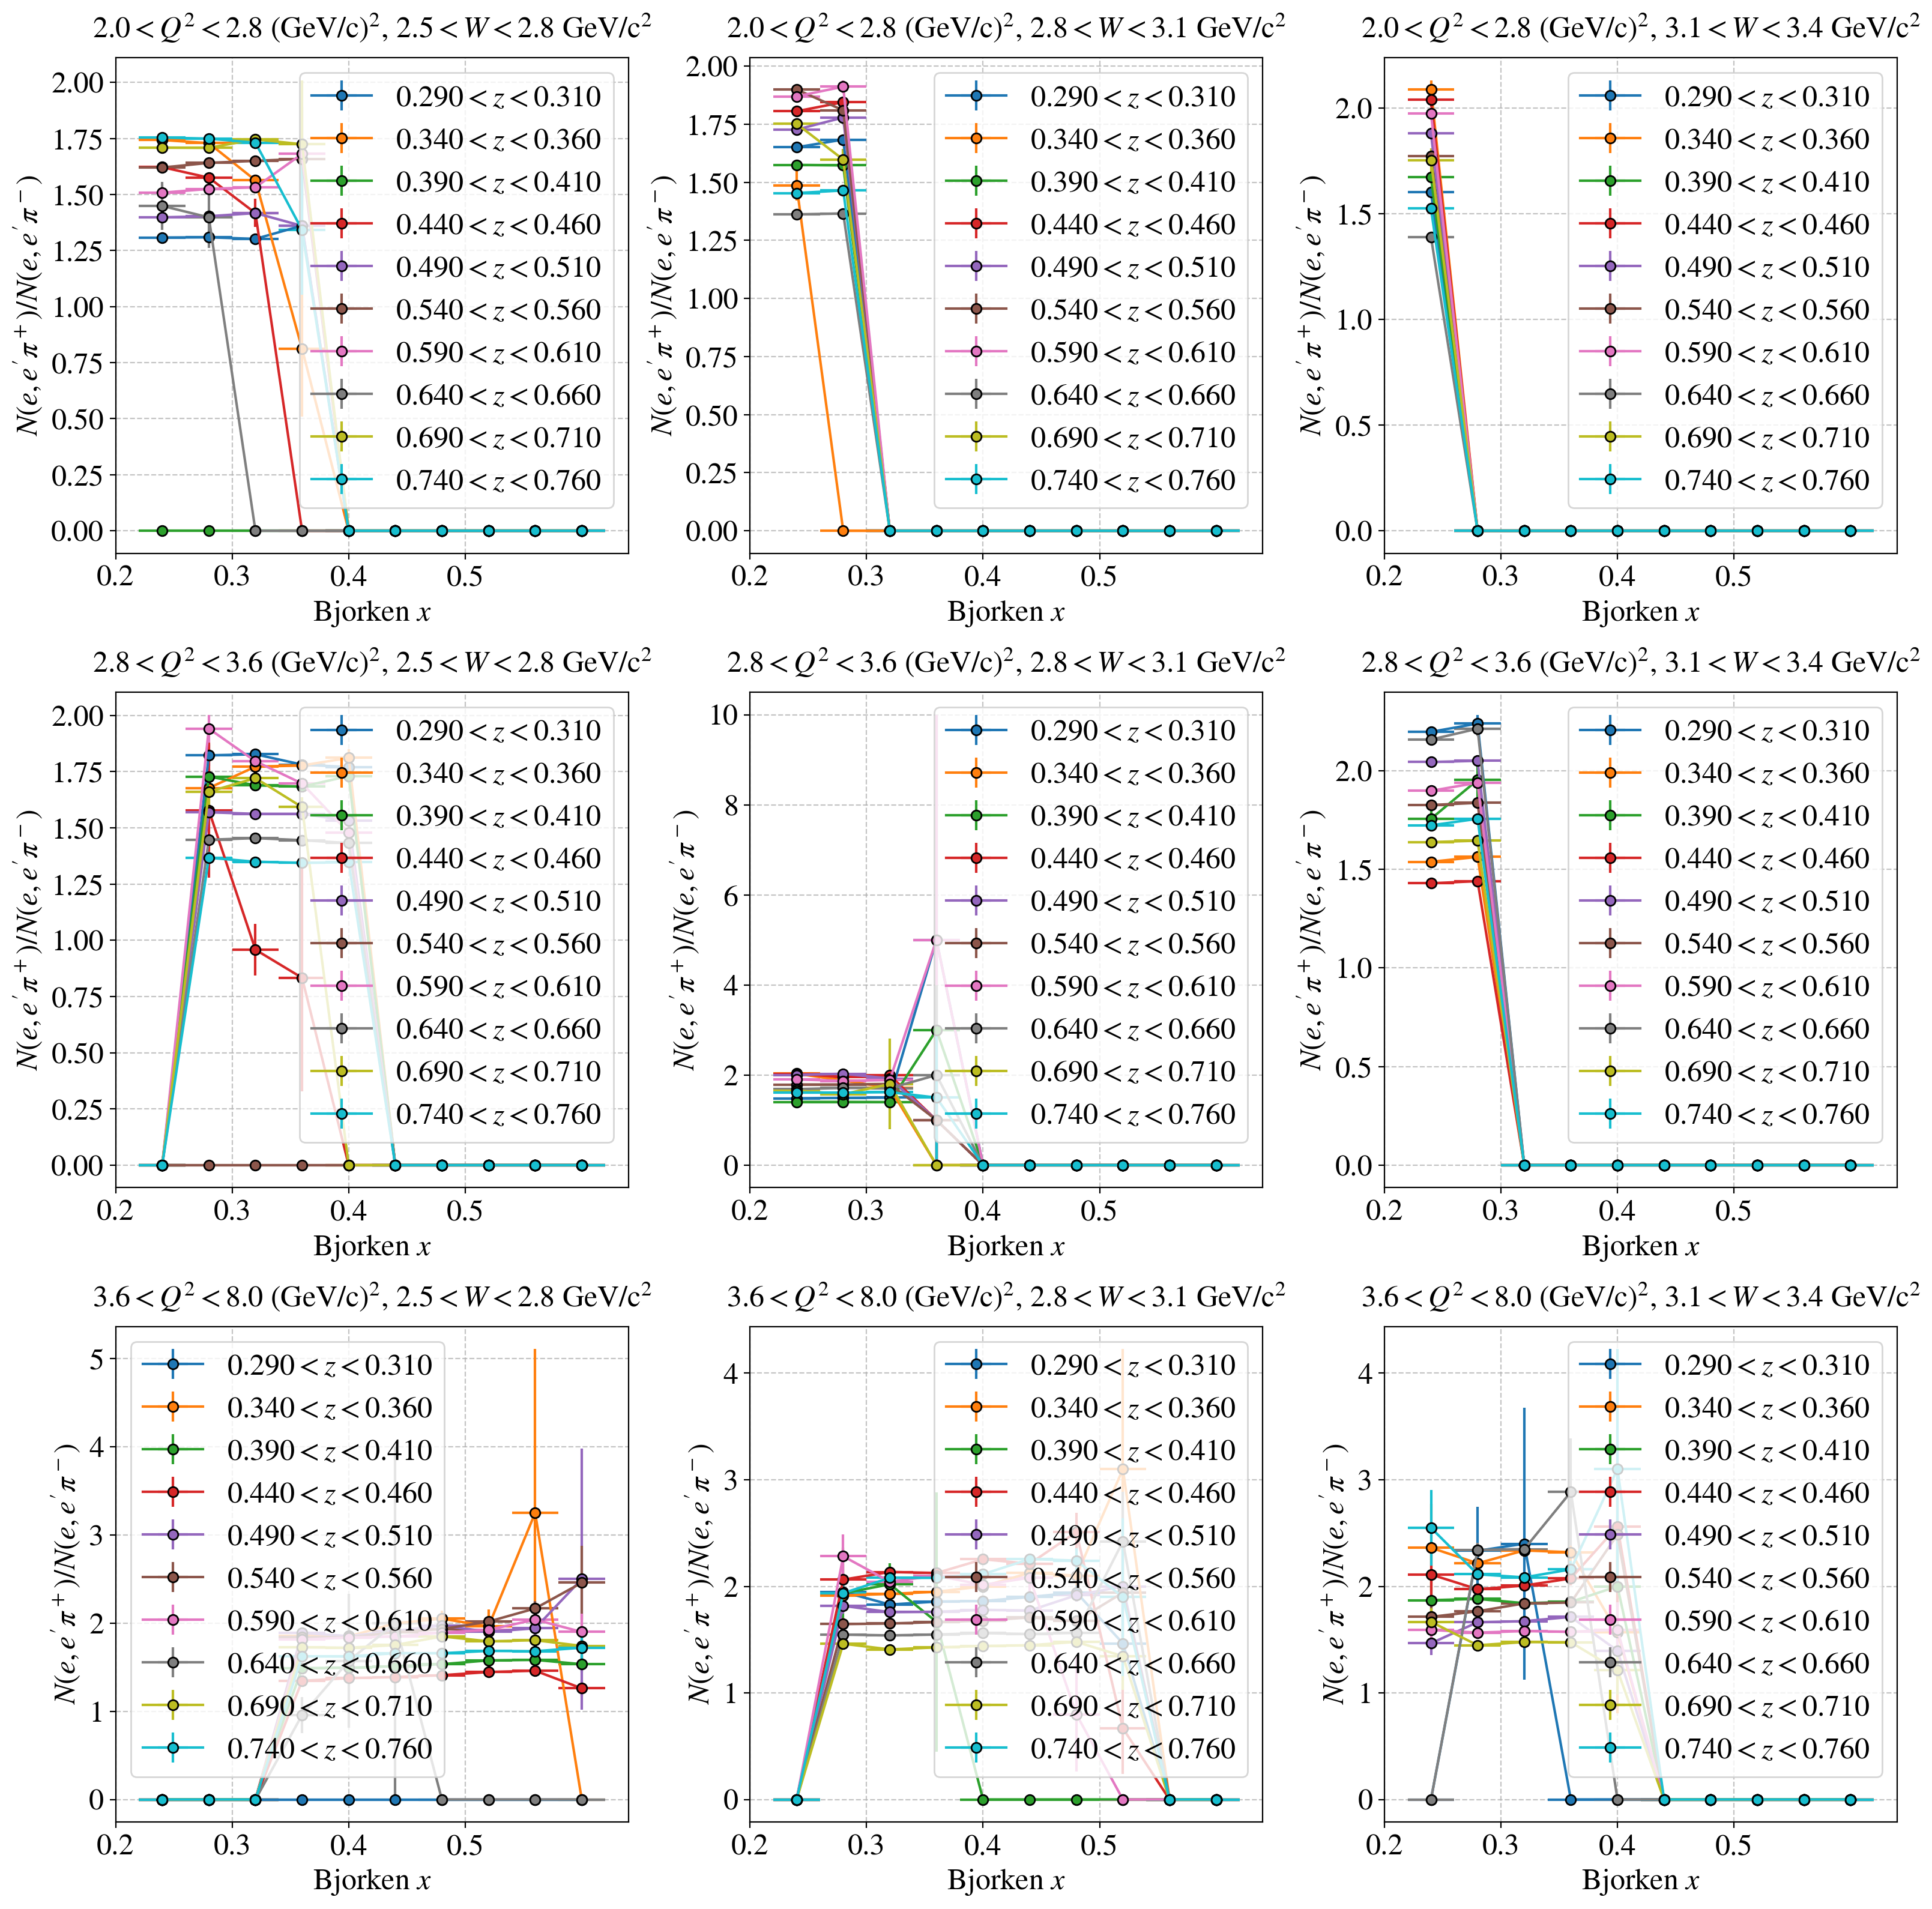

In [40]:
NQ2 = len(Q2_min_arr)
NW  = len(W_min_arr)
fig = plt.figure(figsize=(16,16),tight_layout=True)
for Q2_min,Q2_max,Q2_idx in zip(Q2_min_arr,Q2_max_arr, range(NQ2)):
    for W_min,W_max,W_idx in zip(W_min_arr,W_max_arr, range(NW)):
        suffix   = '_%.1f_Q2_%.1f____%.1f_W_%.1f'%(Q2_min,Q2_max,W_min,W_max)

        axPlot = fig.add_subplot(NQ2, NW, Q2_idx*NW + W_idx + 1)
        SIDIS_results = load_SIDIS_ratio(prefix = prefix, 
                                         fdebug=3,
                                         axPlot = axPlot, 
                                         titlePlot = '$%.1f < Q^2 < %.1f$ (GeV/c)$^2$, $%.1f < W < %.1f$ GeV/c$^2$'%(Q2_min,Q2_max,W_min,W_max),
                                         data_path= data_path,
                                         suffix = suffix, 
                                         doPlotResults=True, 
                                         Nzbins2Plot=3)
        axPlot.set_xticks([0.2,0.3,0.4,0.5]);

## (5.7) Results for many more bins in $z$

In [41]:
# z_bins   = np.arange(0.3,0.8,0.01)
# z_widths = 0.001*np.ones(len(z_bins))

# prefix = 'Untagged_SIDIS_ratio_'
# suffix = ''

In [42]:
# extract_SIDIS_ratio(df_dict  = e_e_pi_pass_cuts,                                
#                            x_var    = var ,                           
#                            x_bins   = x_bins,                           
#                            z_bins   = z_bins,                           
#                            z_widths = z_widths,                           
#                            fdebug   = 0,
#                            prefix   = 'Untagged_SIDIS_ratio_',
#                             data_path= '/Users/erezcohen/Desktop/data/BAND/Results/Q2_and_W_bins/many_z_bins/',
#                            suffix   = '')

In [43]:
# SIDIS_results = load_SIDIS_ratio_DataFrame(z_bins=z_bins,z_widths=z_widths,
#                                            prefix = prefix, suffix = suffix, 
#                                            doPlotResults=True)

# (6) Results with no acceptance matching cut in $p-\theta$ 

In [44]:
Nevents = -1
t0= time.time()
e_e_pi_pass_cuts_no_p_theta_cut,_,_ = apply_further_selection_cuts_to_data(fdebug=2,
                                                                           NeventsMax=Nevents, 
                                                                           doAcceptanceMatchingCut=False);
t1 = time.time() 
print("Time elapsed: %.2f"%(t1 - t0), 'sec (%g us/event)'%((t1 - t0)/Nevents*1.e6)) # CPU seconds elapsed (floating point)

Applying selection cuts not previously imposed
(1) Applying cuts to d(e,e'π) data
Apply a cut on the missing mass of a (e,e'π) reaction: 1.7<Mx<5.0 GeV/c2
(e,e π+ )
60284747 events after original cut (100.0 %)
60284746 events after p-theta cut (100.0 %)
51434057 events after Mx cut (85.3 %)
51341097 events after Kinematical cut (85.2 %)
(e,e π- )
25164298 events after original cut (100.0 %)
25164297 events after p-theta cut (100.0 %)
21317996 events after Mx cut (84.7 %)
21278484 events after Kinematical cut (84.6 %)
 
e_e_pi_GEMC=={}: True
Done applying event-selection cuts


ValueError: too many values to unpack (expected 3)

In [ ]:
save_SIDIS_ratio_DataFrame(df_dict  = e_e_pi_pass_cuts_no_p_theta_cut,                                
                           x_var    = var ,                           
                           x_bins   = x_bins,                           
                           z_bins   = z_bins,                           
                           z_widths = z_widths,                           
                           fdebug   = 0,
                           prefix   = 'Untagged_SIDIS_ratio_',                           
                           suffix   = '_No_AcceptanceMatchingCut')

In [ ]:
prefix = 'Untagged_SIDIS_ratio_'
suffix = '_No_AcceptanceMatchingCut'
SIDIS_results = load_SIDIS_ratio_DataFrame(prefix = prefix, suffix = suffix, doPlotResults=True)

# arxiv

## Check the impact of beam charge normalization on the data

In [ ]:
e_e_pi_pass_cuts['piplus'].runnum

In [ ]:

# Rpips2pims, Rpips2pims_errup, Rpips2pims_errdw = dict(), dict(), dict()
# Y, dY = dict(),dict()
# for z_bin,z_width in zip(z_bins,z_widths):
#     z_min,z_max = z_bin-z_width,z_bin+z_width
#     (Rpips2pims[z_bin],
#      Rpips2pims_errup[z_bin], 
#      Rpips2pims_errdw[z_bin],_,_) = compute_ratio_pips_to_pims(df_dict=e_e_pi_pass_cuts  , 
#                                                              var=var, 
#                                                              bins=x_bins, 
#                                                              z_min=z_min,z_max=z_max)

#     # fit to a constant 
#     y    = Rpips2pims[z_bin]
#     y_err= (Rpips2pims_errup[z_bin],Rpips2pims_errdw[z_bin])
#     p,cov = np.polyfit(x,y,deg=0,cov=True)
#     Y[z_bin],dY[z_bin] = p[0],cov[0,0]

#     # print(z_bin,Rpips2pims_n[z_bin],Rpips2pims_n_errup[z_bin],Rpips2pims_n_errdw[z_bin])
# print('done') 

In [ ]:
# fig = plt.figure(figsize=(9,6))
# ax  = fig.add_subplot(1,1,1)
# for z_bin,z_width in zip(z_bins,z_widths):
#     y    = Rpips2pims[z_bin]
#     y_err= (Rpips2pims_errup[z_bin],Rpips2pims_errdw[z_bin])
#     x_fit = np.linspace(np.min(x),np.max(x),100)
#     y_dw = (Y[z_bin]-dY[z_bin])*np.ones(len(x_fit))
#     y_up = (Y[z_bin]+dY[z_bin])*np.ones(len(x_fit))

#     # plot
#     l=ax.errorbar(x=x, xerr=x_err,  y=y, yerr=y_err,
#                 marker='o',markeredgecolor='k',
#                 label='$z=%.2f\pm%.2f, (\pi^+/\pi^-)=%.2f\pm%.2f$'%(z_bin,z_width,Y[z_bin],dY[z_bin]))
    
#     ax.fill_between( x_fit, y_dw, y_up, color=l[0].get_color(), alpha=0.1)
# set_axes(ax,xlabel,"$N(e,e'\pi^+)/N(e,e'\pi^-)$",
#          title="$\pi^+/\pi^-$ ratio as a function of $x_B$ without a tagged neutron",
#          do_add_grid=True, do_add_legend=True, fontsize=18,
#         );
# plt.legend(bbox_to_anchor=(1,1.05),loc='best',fontsize=18)

### Improve analysis timing with a focus on apply_further_selection_cuts_to_data()
Check timing of the function and improve it, as well as memory usage

In [ ]:
import timeit
timeit.timeit("apply_further_selection_cuts_to_data(fdebug=2, NeventsMax=-1)", 
              setup="from __main__ import apply_further_selection_cuts_to_data",number=1)

In [ ]:
e_e_pi[pi_ch].keys()
# retain only the most important features to reduce memory usage by a large pandas DataFrame
reduced_e_e_pi = dict()
for pi_ch in pi_charge_names:
    reduced_e_e_pi[pi_ch] = e_e_pi[pi_ch][['runnum','evnum',
                                           'e_P','e_Theta','e_Phi', 
                                           'pi_P', 'pi_Theta', 'pi_Phi', 
                                           'Q2', 'W', 'xB', 'Zpi',
                                           'M_X', 'e_DC_sector', 'pi_DC_sector']]
    reduced_e_e_pi[pi_ch] = reduced_e_e_pi[pi_ch].astype({"evnum": int,
                                                          "e_P":np.half,"e_Theta":np.half,"e_Phi":np.half,
                                                          "pi_P":np.half,'pi_Theta':np.half, 'pi_Phi':np.half,
                                                          'Q2':np.half, 'W':np.half, 'xB':np.half, 'Zpi':np.half,
                                                          'M_X':np.half, })

reduced_e_e_pi[pi_ch][0:5]

In [ ]:
for pi_ch in pi_charge_names:
    print(pi_ch)
    print('before cuts')
    print(e_e_pi[pi_ch].info(memory_usage="deep",verbose=False))
    print(' ')    
    # print('reduced dataframe before cuts')
    # print(reduced_e_e_pi[pi_ch].info(memory_usage="deep",verbose=False))
    # print(' ')
    print('after cuts')
    print(e_e_pi_pass_cuts[pi_ch].info(memory_usage="deep",verbose=False))
    print(' ')

In [ ]:
e_e_pi_pass_cuts[pi_ch].index